In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("rsm_perez.csv")
df.head()
print(df.head(20))

     X1    X2   X3  Y1_actual  Y1_pred  Y2_actual  Y2_pred
0   1.0   500  1.5    84.0824  84.5506    61.9981  59.0063
1   1.5  1000  1.5    78.6517  79.3383    59.9883  64.1957
2   2.0  1500  1.5    89.1386  88.6704    79.6470  77.2674
3   1.5   500  2.5    84.2697  84.3867    52.8630  52.2379
4   1.5  1500  0.5    77.5281  77.3174    76.1392  76.1535
5   2.0  1000  2.5    88.2022  87.5702    69.0138  65.3095
6   1.5  1000  1.5    79.9625  79.3383    62.1442  64.1957
7   2.0   500  1.5    83.5206  83.7547    57.9421  63.5373
8   1.5  1500  2.5    85.9551  86.8680    67.5157  65.9679
9   1.5   500  0.5    75.6554  74.8361    68.8311  62.4235
10  2.0  1000  0.5    77.1536  78.0197    75.0064  75.4951
11  1.0  1500  1.5    84.8315  84.5974    73.2525  72.7364
12  1.0  1000  0.5    76.2172  76.3811    69.1965  70.9641
13  1.0  1000  2.5    86.3296  85.9316    59.0383  60.7785
14  1.5  1000  1.5    79.4007  79.3383    61.8884  64.1957


In [3]:
X = df.iloc[:, 0:3]
print("\nX DataFrame head:")
print(X.head(20))


X DataFrame head:
     X1    X2   X3
0   1.0   500  1.5
1   1.5  1000  1.5
2   2.0  1500  1.5
3   1.5   500  2.5
4   1.5  1500  0.5
5   2.0  1000  2.5
6   1.5  1000  1.5
7   2.0   500  1.5
8   1.5  1500  2.5
9   1.5   500  0.5
10  2.0  1000  0.5
11  1.0  1500  1.5
12  1.0  1000  0.5
13  1.0  1000  2.5
14  1.5  1000  1.5


In [4]:
Y1_actual = df.iloc[:, 3:4]
print("\nY1 DataFrame head:")
print(Y1_actual.head(20))


Y1 DataFrame head:
    Y1_actual
0     84.0824
1     78.6517
2     89.1386
3     84.2697
4     77.5281
5     88.2022
6     79.9625
7     83.5206
8     85.9551
9     75.6554
10    77.1536
11    84.8315
12    76.2172
13    86.3296
14    79.4007


In [5]:
scalerX = StandardScaler()
X_norm = scalerX.fit_transform(X)
scalerY = StandardScaler()
Y1_actual_norm = scalerY.fit_transform(Y1_actual)
print(X_norm)
print(Y1_actual_norm)

[[-1.36930639 -1.36930639  0.        ]
 [ 0.          0.          0.        ]
 [ 1.36930639  1.36930639  0.        ]
 [ 0.         -1.36930639  1.36930639]
 [ 0.          1.36930639 -1.36930639]
 [ 1.36930639  0.          1.36930639]
 [ 0.          0.          0.        ]
 [ 1.36930639 -1.36930639  0.        ]
 [ 0.          1.36930639  1.36930639]
 [ 0.         -1.36930639 -1.36930639]
 [ 1.36930639  0.         -1.36930639]
 [-1.36930639  1.36930639  0.        ]
 [-1.36930639  0.         -1.36930639]
 [-1.36930639  0.          1.36930639]
 [ 0.          0.          0.        ]]
[[ 0.46572432]
 [-0.78482817]
 [ 1.63003895]
 [ 0.50885476]
 [-1.04356475]
 [ 1.41440978]
 [-0.48298417]
 [ 0.33635603]
 [ 0.89695964]
 [-1.47480007]
 [-1.12980261]
 [ 0.63822305]
 [-1.34543178]
 [ 0.98319749]
 [-0.61235246]]


In [6]:
X1 = X.iloc[:,0].to_numpy()
X2 = X.iloc[:,1].to_numpy()
X3 = X.iloc[:,2].to_numpy()

basisfunc = np.column_stack((X1,
                             X2,
                             X3,
                             X1*X2,
                             X1*X3,
                             X2*X3,
                             X1**2,
                             X2**2,
                             X3**2
                            ))

print(basisfunc)

[[1.00e+00 5.00e+02 1.50e+00 5.00e+02 1.50e+00 7.50e+02 1.00e+00 2.50e+05
  2.25e+00]
 [1.50e+00 1.00e+03 1.50e+00 1.50e+03 2.25e+00 1.50e+03 2.25e+00 1.00e+06
  2.25e+00]
 [2.00e+00 1.50e+03 1.50e+00 3.00e+03 3.00e+00 2.25e+03 4.00e+00 2.25e+06
  2.25e+00]
 [1.50e+00 5.00e+02 2.50e+00 7.50e+02 3.75e+00 1.25e+03 2.25e+00 2.50e+05
  6.25e+00]
 [1.50e+00 1.50e+03 5.00e-01 2.25e+03 7.50e-01 7.50e+02 2.25e+00 2.25e+06
  2.50e-01]
 [2.00e+00 1.00e+03 2.50e+00 2.00e+03 5.00e+00 2.50e+03 4.00e+00 1.00e+06
  6.25e+00]
 [1.50e+00 1.00e+03 1.50e+00 1.50e+03 2.25e+00 1.50e+03 2.25e+00 1.00e+06
  2.25e+00]
 [2.00e+00 5.00e+02 1.50e+00 1.00e+03 3.00e+00 7.50e+02 4.00e+00 2.50e+05
  2.25e+00]
 [1.50e+00 1.50e+03 2.50e+00 2.25e+03 3.75e+00 3.75e+03 2.25e+00 2.25e+06
  6.25e+00]
 [1.50e+00 5.00e+02 5.00e-01 7.50e+02 7.50e-01 2.50e+02 2.25e+00 2.50e+05
  2.50e-01]
 [2.00e+00 1.00e+03 5.00e-01 2.00e+03 1.00e+00 5.00e+02 4.00e+00 1.00e+06
  2.50e-01]
 [1.00e+00 1.50e+03 1.50e+00 1.50e+03 1.50e+00 2.25e+0

In [7]:
scalerbasisfunc = StandardScaler()
basisfunc_norm = scalerbasisfunc.fit_transform(basisfunc)

print(basisfunc_norm)


[[-1.36930639 -1.36930639  0.         -1.49071198 -0.5992016  -0.79056942
  -1.25469866 -1.19229137 -0.23735633]
 [ 0.          0.          0.          0.          0.          0.
  -0.12093481 -0.17996851 -0.23735633]
 [ 1.36930639  1.36930639  0.          2.23606798  0.5992016   0.79056942
   1.46633458  1.50723626 -0.23735633]
 [ 0.         -1.36930639  1.36930639 -1.11803399  1.19840319 -0.26352314
  -0.12093481 -1.19229137  1.54281616]
 [ 0.          1.36930639 -1.36930639  1.11803399 -1.19840319 -0.79056942
  -0.12093481  1.50723626 -1.12744258]
 [ 1.36930639  0.          1.36930639  0.74535599  2.19707252  1.05409255
   1.46633458 -0.17996851  1.54281616]
 [ 0.          0.          0.          0.          0.          0.
  -0.12093481 -0.17996851 -0.23735633]
 [ 1.36930639 -1.36930639  0.         -0.74535599  0.5992016  -0.79056942
   1.46633458 -1.19229137 -0.23735633]
 [ 0.          1.36930639  1.36930639  1.11803399  1.19840319  2.37170825
  -0.12093481  1.50723626  1.54281616]

In [8]:
model1 = LinearRegression()
model1.fit(basisfunc_norm, Y1_actual_norm)

print("Coefficients: \n",model1.intercept_, model1.coef_)

r_sq = model1.score(basisfunc_norm, Y1_actual_norm)
print(f"R^2: {r_sq}")

from sklearn.metrics import mean_squared_error

# Predict normalized Y1
Y1_pred_norm = model1.predict(basisfunc_norm)

# Inverse transform to actual Y1
Y1_pred = scalerY.inverse_transform(
    Y1_pred_norm.reshape(-1, 1)
)

# Correct MSE
mse_Y1 = mean_squared_error(Y1_actual, Y1_pred)
print("MSE Y1:", mse_Y1)


NMSE = mse_Y1 / ((Y1_actual_norm - Y1_actual_norm.mean())**2).sum()
print(f"NMSE: {NMSE}")


Coefficients: 
 [2.58128027e-15] [[-3.95228468 -2.0522629   1.18097605  0.75211322  0.13491898 -0.02045856
   3.64502275  1.68262973 -0.49254595]]
R^2: 0.985568606966969
MSE Y1: 0.2721548204999993
NMSE: 0.018143654699999956


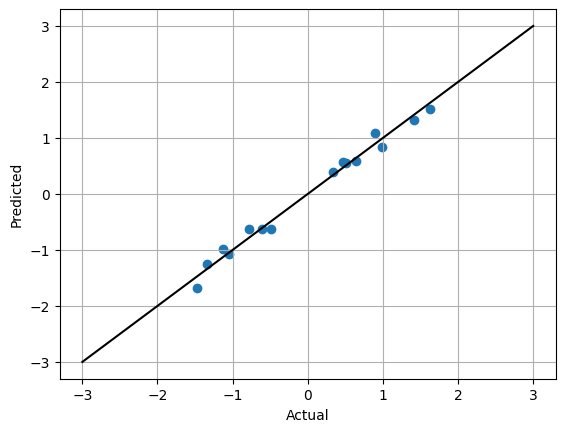

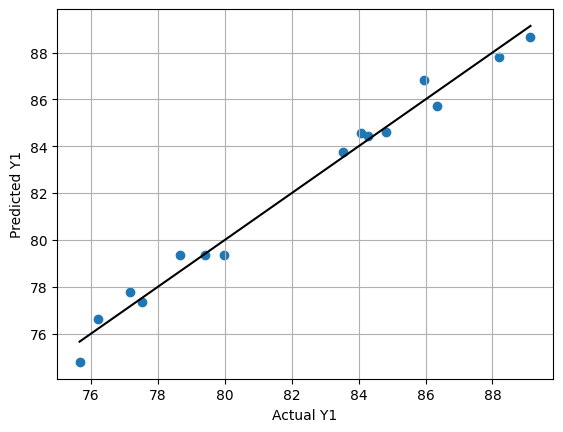

In [9]:
plt.scatter(Y1_actual_norm, Y1_pred_norm)
plt.plot(np.array([-3, 3]), np.array([-3, 3]), color='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

#for non normalized or og scale
Y1_pred = scalerY.inverse_transform(Y1_pred_norm)

plt.scatter(Y1_actual, Y1_pred)
plt.plot([Y1_actual.min(), Y1_actual.max()], [Y1_actual.min(), Y1_actual.max()], 'k')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y1")
plt.grid()
plt.show()
# end for Y1 problem 2 no.1

In [10]:
#no.2 of problem 2
#X is already defined above

Y2_actual = df.iloc[:, 5:6]
print("\nY2 DataFrame head:")
print(Y2_actual.head(20))


Y2 DataFrame head:
    Y2_actual
0     61.9981
1     59.9883
2     79.6470
3     52.8630
4     76.1392
5     69.0138
6     62.1442
7     57.9421
8     67.5157
9     68.8311
10    75.0064
11    73.2525
12    69.1965
13    59.0383
14    61.8884


In [11]:
scalerY = StandardScaler()
Y2_actual_norm = scalerY.fit_transform(Y2_actual)
print(X_norm)
print(Y2_actual_norm)

[[-1.36930639 -1.36930639  0.        ]
 [ 0.          0.          0.        ]
 [ 1.36930639  1.36930639  0.        ]
 [ 0.         -1.36930639  1.36930639]
 [ 0.          1.36930639 -1.36930639]
 [ 1.36930639  0.          1.36930639]
 [ 0.          0.          0.        ]
 [ 1.36930639 -1.36930639  0.        ]
 [ 0.          1.36930639  1.36930639]
 [ 0.         -1.36930639 -1.36930639]
 [ 1.36930639  0.         -1.36930639]
 [-1.36930639  1.36930639  0.        ]
 [-1.36930639  0.         -1.36930639]
 [-1.36930639  0.          1.36930639]
 [ 0.          0.          0.        ]]
[[-0.58117949]
 [-0.85284914]
 [ 1.8044661 ]
 [-1.81599361]
 [ 1.33030808]
 [ 0.36715008]
 [-0.56143079]
 [-1.12943907]
 [ 0.16464819]
 [ 0.34245407]
 [ 1.17718469]
 [ 0.94010568]
 [ 0.3918461 ]
 [-0.98126299]
 [-0.59600791]]


In [12]:
#defined basis func above (retain)

#for Y2
model2 = LinearRegression()
model2.fit(basisfunc_norm, Y2_actual_norm)

print("Coefficients: \n",model2.intercept_, model2.coef_)

r_sq = model2.score(basisfunc_norm, Y2_actual_norm)
print(f"R^2: {r_sq}")

from sklearn.metrics import mean_squared_error

# Predict (normalized)
Y2_pred_norm = model2.predict(basisfunc_norm)

# Inverse transform to actual Y1
Y2_pred = scalerY.inverse_transform(
    Y2_pred_norm.reshape(-1, 1)
)

# Correct MSE
mse_Y2 = mean_squared_error(Y2_actual, Y2_pred)
print("MSE Y2:", mse_Y2)

NMSE = mse_Y2 / ((Y2_actual_norm - Y2_actual_norm.mean())**2).sum()
print(f"NMSE: {NMSE}")


Coefficients: 
 [-2.328742e-15] [[-2.99210608 -1.38334094 -1.89193822  0.94761431  0.35239047  0.4709206
   2.56217274  1.03011943  0.7366604 ]]
R^2: 0.9398209936631079
MSE Y2: 3.2935817421666713
NMSE: 0.21957211614444477


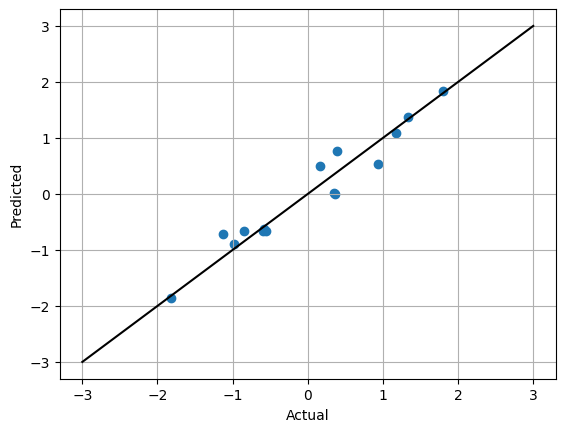

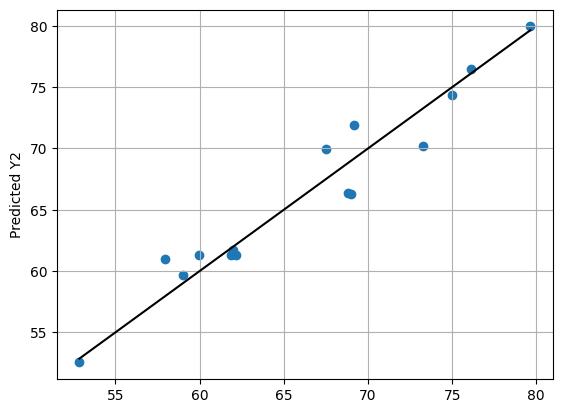

In [13]:
plt.scatter(Y2_actual_norm, Y2_pred_norm)
plt.plot(np.array([-3, 3]), np.array([-3, 3]), color='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

#for non normalized or og scale
Y2_pred = scalerY.inverse_transform(Y2_pred_norm)

plt.scatter(Y2_actual, Y2_pred)
plt.plot([Y2_actual.min(), Y2_actual.max()], [Y2_actual.min(), Y2_actual.max()], 'k')
plt.ylabel("Predicted Y2")
plt.grid()
plt.show()
# end for Y2 problem 2 no.2

In [14]:
#no.3 prob 2
from scipy.optimize import minimize

In [15]:
df = pd.read_csv("rsm_perez.csv")
X = df.iloc[:, 0:3].values           
Y1_actual = df.iloc[:, 3:4].values   
Y2_actual = df.iloc[:, 5:6].values  
print(Y1_actual)
print(Y2_actual)

# Extract individual variables from the data 
x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]

basisfunc = np.column_stack((
    X1,
    X2,
    X3,
    X1 * X2,
    X1 * X3,
    X2 * X3,
    X1**2,
    X2**2,
    X3**2
))

intercept = np.column_stack((np.ones(len(X1)), basisfunc)) 


[[84.0824]
 [78.6517]
 [89.1386]
 [84.2697]
 [77.5281]
 [88.2022]
 [79.9625]
 [83.5206]
 [85.9551]
 [75.6554]
 [77.1536]
 [84.8315]
 [76.2172]
 [86.3296]
 [79.4007]]
[[61.9981]
 [59.9883]
 [79.647 ]
 [52.863 ]
 [76.1392]
 [69.0138]
 [62.1442]
 [57.9421]
 [67.5157]
 [68.8311]
 [75.0064]
 [73.2525]
 [69.1965]
 [59.0383]
 [61.8884]]


In [16]:
y1 = Y1_actual 
y2 = Y2_actual 

w_Y1 = np.linalg.pinv(intercept).dot(y1) #getting regression coefficients for Y1 and Y2
w_Y2 = np.linalg.pinv(intercept).dot(y2)


In [17]:
def response_Y1(x):
    a, b, c = x #where a for X1, b fr X2 and c for X3

    return (
        w_Y1[0]
        + w_Y1[1]*a + w_Y1[2]*b + w_Y1[3]*c
        + w_Y1[4]*a*b + w_Y1[5]*a*c + w_Y1[6]*b*c
        + w_Y1[7]*a**2 + w_Y1[8]*b**2 + w_Y1[9]*c**2
    )


In [18]:
def response_Y2(x):
    a, b, c = x #where a for X1, b fr X2 and c for X3

    return (
        w_Y2[0]
        + w_Y2[1]*a + w_Y2[2]*b + w_Y2[3]*c
        + w_Y2[4]*a*b + w_Y2[5]*a*c + w_Y2[6]*b*c
        + w_Y2[7]*a**2 + w_Y2[8]*b**2 + w_Y2[9]*c**2
    )


In [19]:
bounds = [(1, 2), (500, 1500), (0.5, 2.5)]
x_start = [
    np.mean([1.0, 3.0]),       
    np.mean([500.0, 2000.0]),   
    np.mean([1.0, 3.0])         
] #intiial guess


In [20]:
max_Y1 = minimize( #the minimization process
    lambda x:-response_Y1(x),
    x_start,
    bounds=bounds,
    method="L-BFGS-B"
)

max_Y2 = minimize(
    lambda x: -response_Y2(x),
    x_start,
    bounds=bounds,
    method="L-BFGS-B"
)


In [21]:
print("Getting value of Y1 after optimization")
print(f"Optimal X1 = {max_Y1.x[0]:.3f}")
print(f"Optimal X2 = {max_Y1.x[1]:.1f}")
print(f"Optimal X3 = {max_Y1.x[2]:.3f}")
print("Maximum Y1:", -max_Y1.fun)

print("Getting value of Y2 after optimization")
print(f"Optimal X1 = {max_Y2.x[0]:.3f}")
print(f"Optimal X2 = {max_Y2.x[1]:.1f}")
print(f"Optimal X3 = {max_Y2.x[2]:.3f}")
print("Maximum Y2:", -max_Y2.fun)


Getting value of Y1 after optimization
Optimal X1 = 2.000
Optimal X2 = 1500.0
Optimal X3 = 2.500
Maximum Y1: [92.68102498]
Getting value of Y2 after optimization
Optimal X1 = 2.000
Optimal X2 = 1500.0
Optimal X3 = 0.500
Maximum Y2: [84.59368748]
